In [ ]:
# Joining information from different files to be analysed together.

In [ ]:
import sys
sys.path.insert(0, "/project/elife/modules")
import re
import bs_preprocess
import pandas as pd

#### IN and OUT files

# Files to read with datframe containing DOI and articles
# Reading several files that will be joined before preprocessing.
file_csv = '/project/elife/data/DOI_cited_10000.csv'
file_csv2 = '/project/elife/data/data2v/DOI_cited_10000v2_papers.csv'

#  Files to store the information
# Just the joined dataframe:
file_df_toanalyise_prep = '/project/elife/data/preprocess/DOI_cited_10000_10000v2_papers_non_prep.csv'
# After preprocessing:
file_df_toanalyise_non_prep = '/project/elife/data/preprocess/DOI_cited_10000_10000v2_papers_prep.csv'

# 1.- ANALYSIS

•	Analyse file containing papers citing a particular DOI. This DOI can be read from a file (the one used in get_papers) or directly introduced in a list.
•	By calling get_df_analise_section it generates a dataframe containing:
    
    # df['cited_DOI', 'citing_DOI', 'reference_id', 'introduction_found', 
    #   'cited_in_introduction', 'maintext_found', 'cited_in_maintext', 
    #   'discussion_found', 'cited_in_discussion', 'conclusions_found', 
    #   'cited_in_conclusions', 'sentence_citing_intro', 
    #   'sentence_citing_maintext', 'sentence_citing_discussion', 
    #   'sentence_citing_conclusions']
    
-	reference_id is the number of reference of the cited paper in a particular paper. 
-	'introduction_found', 'maintext_found', 'discussion_found' and 'conclusions_found' get True/False value depending on whether a particular section has been found.
-	'cited_in_introduction', 'cited_in_maintext', 'cited_in_discussion', 'cited_in_conclusions' get True/False values depending on whether the paper is cited in these sections.
-	'sentence_citing_intro',  'sentence_citing_maintext', 'sentence_citing_discussion',    'sentence_citing_conclusions' are the sentences in each section where the paper is cited.


•	It also generates another dataframe with information about how many times the paper has been cited in each section: 

     # dict_citation_hyst ['DOI_cited', 'total_papers_citing', 'papers_all_sections_found',  
     #   'cited_in_introduction', 'cited_in_maintext', 'cited_in_discussion', 'cited_in_conlusions']

•	It saves the dataframes in two files. 
Note: For “df” only the information of the last paper (cited_DOI) analysed is saved 




In [ ]:
import pandas as pd
import sys
sys.path.insert(0, "/project/elife/modules")

import get_df_analise_section
import imp
imp.reload(get_df_analise_section)

import os
os.chdir("/project/elife/modules")
os.getcwd()

# IN and OUT Files
# File to read. Dataframe contatining 'DOI' and 'article' from file:
#file_csv = file_df_toanalyise_non_prep # To check the df just created following the notebook sequentially
file_csv = '/project/elife/data/preprocess/DOI_cited_1000_1000v2_papers_prep.csv'

# Files to store the dataframes with the analysis at the end:
#file_df_analysis = '/project/elife/data/analysis/df_1000_1000v2_prep_v2.csv'
#file_df_analysis_hist = '/project/elife/data/analysis/df_1000_1000v2_prep_hist_v2.csv'


"""
# IF READING DOIs FROM FILE

# Read dataframee with 'DOI' and 'article'
df_articles = pd.read_csv(file_csv, sep='\t', header = None, encoding='utf-8', names = ['DOI_cited', 'article_citing'])

list_DOIs = []
list_df_analysis = []
list_citation_hyst = []

# List of DOIs we will study. We will study manuscripts above a particular number of citations
minimun_number_citations = 10
for DOI in df_articles.DOI_cited.unique():
    if df_articles[df_articles['DOI_cited'] == DOI].shape[0] >= minimun_number_citations:
        list_DOIs.append(DOI)
"""    

# IF DIRECTLY PROVIDING A LIST OF DOIs
list_df_analysis = []
list_citation_hyst = []

list_DOIs = ["10.1126/science.1179052"]
file_csv = '/project/elife/data/data2v/DOI_cited_science_1179052_retracted_prep.csv'
file_df_analysis = '/project/elife/data/analysis/df_science1179052_retracted.csv'
file_df_analysis_hist = '/project/elife/data/analysis/df_science1179052_retracted_hist_v2.csv'
df_articles = pd.read_csv(file_csv, sep='\t', header = None, encoding='utf-8', names = ['DOI_cited', 'article_citing'])


for DOI in list_DOIs: 
    
    df_articles_citingDOI = df_articles[df_articles['DOI_cited'] == DOI]['article_citing']
    list_articles_citingDOI = df_articles_citingDOI.values.tolist()
    #print(list_articles_citingDOI)
    
    df = get_df_analise_section.get_df(DOI, list_articles_citingDOI)
    # columns received in alphabetical order:    
    # df['cited_DOI', 'cited_in_conclusions','cited_in_discussion',
    #    'cited_in_introduction', 'cited_in_maintext', 'citing_DOI',
    #    'conclusions_found', 'discussion_found', 'introduction_found',
    #    'maintext_found', 'reference_id', 'sentence_citing_conclusions',
    #    'sentence_citing_discussion', 'sentence_citing_intro', 'sentence_citing_maintext']
    # Original:
    # df['cited_DOI', 'citing_DOI', 'reference_id', 'introduction_found', 
    #   'cited_in_introduction', 'maintext_found', 'cited_in_maintext', 
    #   'discussion_found', 'cited_in_discussion', 'conclusions_found', 
    #   'cited_in_conclusions', 'sentence_citing_intro', 
    #   'sentence_citing_maintext', 'sentence_citing_discussion', 
    #   'sentence_citing_conclusions']
    
    
    total_papers = df.shape[0]
    # mask1: sections found
    #mask1 = (df['introduction_found'] == True) & ((df['discussion_found'] == True) | (df['conclusions_found'] == True))  
    
    mask1 = (df['introduction_found'] == True) | ((df['discussion_found'] == True) | (df['conclusions_found'] == True))  

    # mask2: the reference is found at least in one section
    mask2 = (df['cited_in_introduction'] == True) | (df['cited_in_maintext'] == True) | (df['conclusions_found'] == True) | df['sentence_citing_conclusions'] == True
     
    mask = mask1 #& mask2
    
    papers_all_sections_found = df[mask].shape[0]
    print(papers_all_sections_found)
    
    print("papers_all_sections_found:  ", papers_all_sections_found)
        
    try:
        in_introduction = (df[mask]['cited_in_introduction'].value_counts(normalize = True).to_dict()[True])
    except KeyError:
        in_introduction = 0
    
    try:
        in_maintext = (df[mask]['cited_in_maintext'].value_counts(normalize = True).to_dict()[True])
    except KeyError:
        in_maintext = 0
    
    try: 
        in_discussion = (df[mask]['cited_in_discussion'].value_counts(normalize = True).to_dict()[True])
    except KeyError:
        in_discussion = 0
        
    try:
        in_conlusions = (df[mask]['cited_in_conclusions'].value_counts(normalize = True).to_dict()[True])
    except KeyError:
        in_conlusions = 0
    
    dict_citation_hyst = ({'DOI_cited': DOI,  
                       'total_papers_citing': total_papers,
                       'papers_all_sections_found': papers_all_sections_found, 
                       'cited_in_introduction': in_introduction, 
                       'cited_in_maintext': in_maintext,
                       'cited_in_discussion': in_discussion,
                       'cited_in_conlusions': in_conlusions})

#    list_df_analysis.append(df)
    list_citation_hyst.append(dict_citation_hyst) #index required because we are passing the values of lists

    
    
#pd_analysis = pd.DataFrame(list_df_analysis) 
pd_citation_hyst = pd.DataFrame(list_citation_hyst) 


############### SAVING IN FILES #####################
df.to_csv(file_df_analysis,header=False, mode='a', sep='\t', encoding='utf-8')
pd_citation_hyst.to_csv(file_df_analysis_hist,header=False, mode='a', sep='\t', encoding='utf-8')


    

# 2.- PLOT

•	Plot the analysis (file_df_analysis_hist). 
-	For multiple papers (used to plot the analysis of papers having the same number of citations)
-	Just for one.


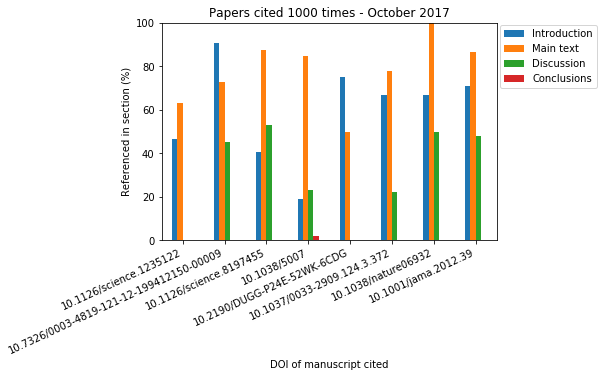

In [32]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

# Reading the pd_citation_hyst from file:
file_df_analysis_hist = '/project/elife/data/analysis/df_1000_1000v2_prep_hist_.csv'
pd_citation_hyst = pd.read_csv(file_df_analysis_hist, sep='\t', header = None, encoding='utf-8', names =  ['DOI_cited', 'cited_in_conlusions', 'cited_in_discussion', 'cited_in_introduction','cited_in_maintext', 'papers_all_sections_found', 'total_papers_citing'])                                                              
                               
# Or using data from before:
#d_citation_hyst_col = pd_citation_hyst[['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions']]

pd_cita_hyst_percent = pd_citation_hyst.copy()#[4:7] #FOR PAPERS HAVING 2000 
pd_cita_hyst_percent[['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions']] = pd_cita_hyst_percent[['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions']].apply(lambda x: 100*x)



#pd_citation_hyst_col.plot(kind = 'bar')
pd_cita_hyst_percent.plot(x='DOI_cited', y = ['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions'], kind='bar')
plt.xticks(rotation=25, ha ='right')
plt.xlabel("DOI of manuscript cited")
plt.ylabel("Referenced in section (%)")
plt.ylim([0,100])
plt.legend(['Introduction', 'Main text','Discussion', 'Conclusions'], loc='upper right', bbox_to_anchor=(1.314, 1.015), ncol = 1)
plt.title('Papers cited 1000 times - October 2017')




#plt.suptitle("cited DOI: " + str(DOI))



#plt.hist(x, 10, normed=1, histtype='bar', label=['cited_in_introduction', 'cited_in_maintext', 'cited_in_discussion', 'cited_in_discussion'])                
#color=['crimson', 'burlywood', 'chartreuse'],
          

In [33]:
file_df_analysis_hist = '/project/elife/data/analysis/df_2000_2000v2_prep_hist_.csv'
pd_citation_hyst = pd.read_csv(file_df_analysis_hist, sep='\t', header = None, encoding='utf-8', names =  ['DOI_cited', 'cited_in_conlusions', 'cited_in_discussion', 'cited_in_introduction','cited_in_maintext', 'papers_all_sections_found', 'total_papers_citing'])                                                              
pd_citation_hyst[['DOI_cited','papers_all_sections_found', 'total_papers_citing']]

,DOI_cited,papers_all_sections_found,total_papers_citing
0,10.1070/PU1968v010n04ABEH003699,1,10
1,10.1126/science.279.5350.548,11,23
2,10.1126/science.1058040,174,278
3,10.1126/science.1209688,2,17
4,10.1086/284325,63,107
5,10.1287/mnsc.35.8.982,13,47
6,10.1002/ijc.29210,173,363


# 3. ANALYSING AND PLOTTING JUST 1 paper

In [ ]:
import sys
sys.path.insert(0, "/project/elife/modules")

import get_df_analise_section
import imp
imp.reload(get_df_analise_section)

import os
os.chdir("/project/elife/modules")
os.getcwd()


list_DOIs = []
list_citation_hyst = []

# List of DOIs we will study. We will study manuscripts that above a certain number of citations
minimun_number_citations = 10

for DOI in df1000.DOI_cited.unique():
    if df1000[df1000['DOI_cited'] == DOI].shape[0] > minimun_number_citations:
        list_DOIs.append(DOI)
    

DOI =  list_DOIs[2]

df_articles_citingDOI = df1000[df1000['DOI_cited'] == DOI]['article_citing']
list_articles_citingDOI = df_articles_citingDOI.values.tolist()
    #print(list_articles_citingDOI)
    
df = get_df_analise_section.get_df(DOI, list_articles_citingDOI)
    #df['cited_DOI', 'citing_DOI', 'reference_id', 'introduction_found', 
    #   'cited_in_introduction', 'maintext_found', 'cited_in_maintext', 
    #   'discussion_found', 'cited_in_discussion', 'conclusions_found', 
    #   'cited_in_conclusions', 'sentence_citing_intro', 
    #   'sentence_citing_maintext', 'sentence_citing_discussion', 
    #   'sentence_citing_conclusions']
    
    
total_papers = df.shape[0]
    # mask1: sections found
mask1 = (df['introduction_found'] == True) & ((df['discussion_found'] == True) )#| (df['conclusions_found'] == True))  
    # mask2: the reference is found at least in one section
mask2 = (df['cited_in_introduction'] == True) | (df['cited_in_maintext'] == True) | (df['conclusions_found'] == True) | df['sentence_citing_conclusions'] == True
     
mask = mask1 & mask2
    
papers_all_sections_found = df[mask].shape[0]
    
print("papers_all_sections_found:  ", papers_all_sections_found)
        
try:
    in_introduction = (df[mask]['cited_in_introduction'].value_counts(normalize = True).to_dict()[True])
except KeyError:
    in_introduction = 0
    
try:
    in_maintext = (df[mask]['cited_in_maintext'].value_counts(normalize = True).to_dict()[True])
except KeyError:
    in_maintext = 0
    
try: 
    in_discussion = (df[mask]['cited_in_discussion'].value_counts(normalize = True).to_dict()[True])
except KeyError:
    in_discussion = 0
        
try:
    in_conlusions = (df[mask]['cited_in_conclusions'].value_counts(normalize = True).to_dict()[True])
except KeyError:
    in_conlusions = 0
    
dict_citation_hyst = ({'DOI_cited': DOI,  
                       'total_papers_citing': total_papers,
                       'papers_all_sections_found': papers_all_sections_found, 
                       'cited_in_introduction': in_introduction, 
                       'cited_in_maintext': in_maintext,
                       'cited_in_discussion': in_discussion,
                       'cited_in_conlusions': in_conlusions})

    
list_citation_hyst.append(dict_citation_hyst) #index required because we are passing the values of lists

    
    
    
pd_citation_hyst = pd.DataFrame(list_citation_hyst)  

    

In [ ]:
#import matplotlib.pylab as plt
#pd_citation_hyst
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set_context({"figure.figsize": (40, 60)})
sns.color_palette("pastel")
sns.set()
   



pd_cita_hyst_percent = pd_citation_hyst.copy()
pd_cita_hyst_percent[['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions']] = pd_cita_hyst_percent[['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions']].apply(lambda x: 100*x)



#pd_citation_hyst_col.plot(kind = 'bar')
figure = pd_cita_hyst_percent.plot(x='DOI_cited', y = ['cited_in_introduction', 'cited_in_maintext','cited_in_discussion', 'cited_in_conlusions'], kind='bar')
plt.xticks(rotation=0, ha ='right', fontsize=14)
plt.xlabel("DOI of manuscript cited", fontsize=14)
plt.ylabel("Referenced in section (%)", fontsize=14)


figure.spines["top"].set_visible(False)    
figure.spines["bottom"].set_visible(True)    
figure.spines["right"].set_visible(False)    
figure.spines["left"].set_visible(True)    




plt.ylim([0,80])
plt.legend(['Introduction', 'Main text','Discussion', 'Conclusions'], loc='upper right', bbox_to_anchor=(1.013, 1.017), ncol = 2)
#grip.map()


#https://stackoverflow.com/questions/43530476/how-do-i-plot-this-using-seaborn